## Name: Mariz Essam Sobhy Ghaly
## ID: 1808421

---

In [ ]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# data imbalanced
from imblearn.datasets import make_imbalance # undersampling
from sklearn.utils import resample # oversampling
from imblearn.over_sampling import SMOTE # SMOTE

# 2) Standarize nad change dist of features
from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# 3) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
from sklearn.feature_selection import RFE, RFECV 
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 4) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
#for accurace of regression use model.score(X_test, y_test) mean_absolute_error, mean_squared_error

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# you can use (cross_val_score == KFold) (like validation_split=0.1 to get validation_acc) for calssification or regression

#pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# 5) Model summary = features importance and effect + sharp values
import eli5
from eli5.sklearn import PermutationImportance # feature importance
# from pdpbox import pdp, get_dataset, info_plots #for pdp plots
import shap  # package used to calculate Shap values
import time

# 6) DNN & images & audio visualize
import tensorflow as tf
import cv2
import IPython

In [ ]:
data = open('winequality-red.csv', 'rb')
result = chardet.detect(data.read(10000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
# could make it using sep easier
df = pd.read_csv('winequality-red.csv', encoding=result['encoding'], sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info() # no cleaning needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualization

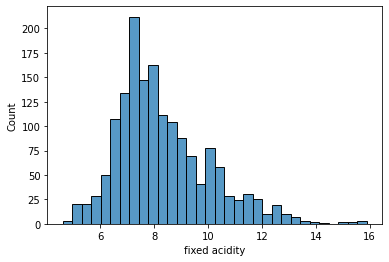

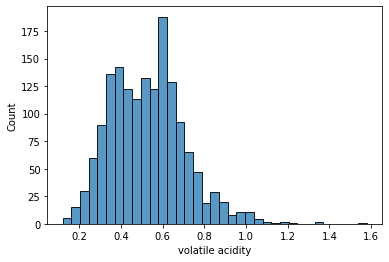

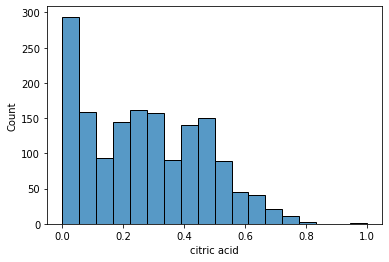

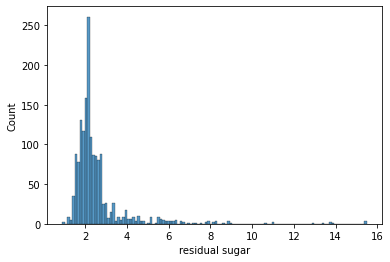

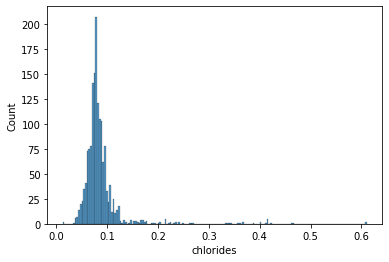

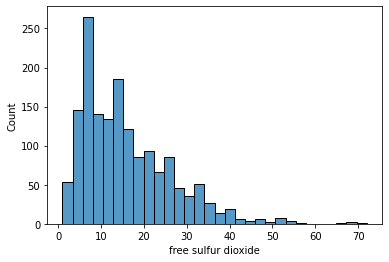

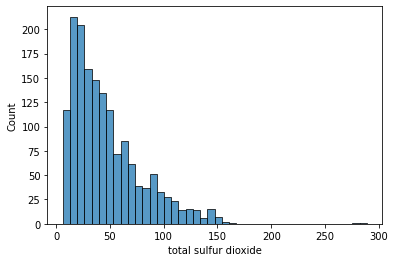

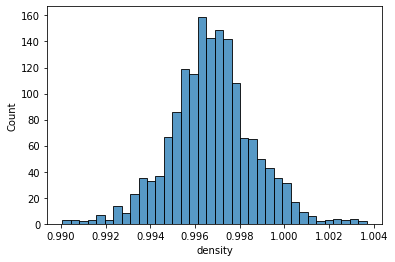

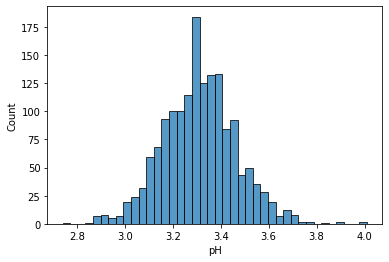

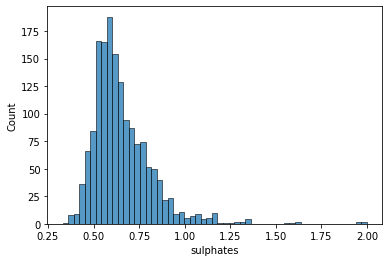

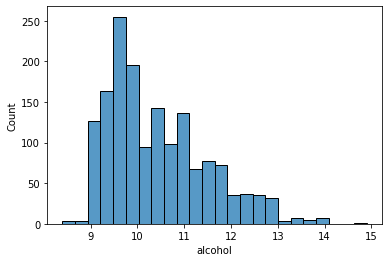

In [ ]:
# dist are normal so this is good
columns = list(df.columns) # no Encoding needed
columns.remove('quality')
for col in columns:
    sns.histplot(df[col])
    plt.show()

<AxesSubplot:>

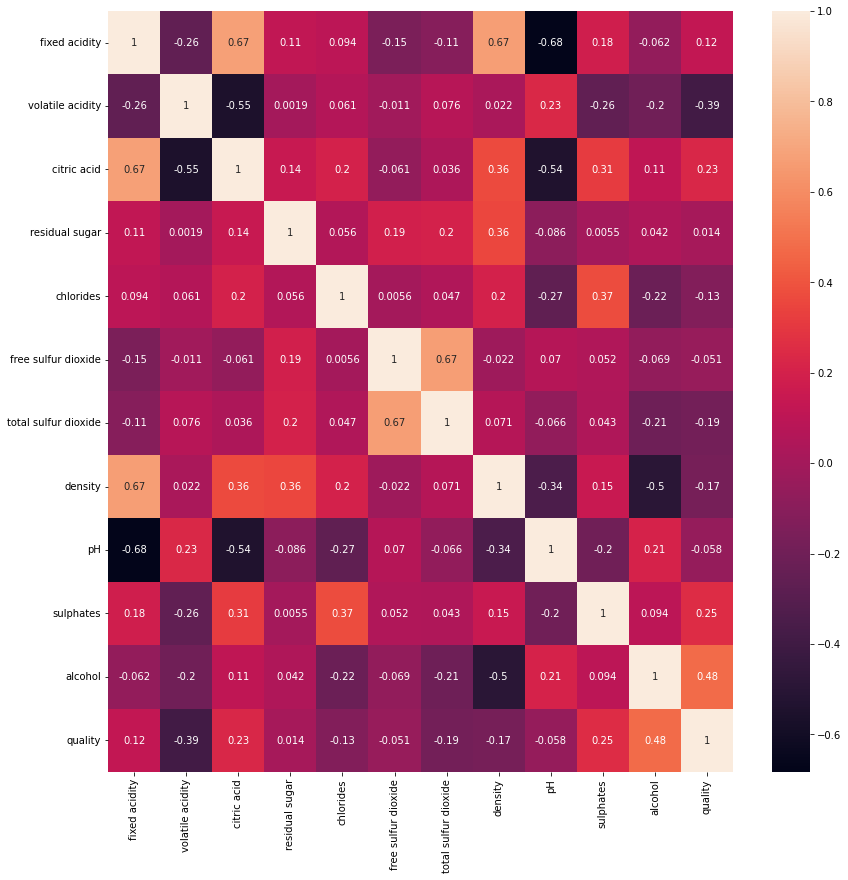

In [ ]:
plt.figure(figsize=(14, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True) # no corr

In [ ]:
# to prevent data leakage
y = df['quality']
X = df.drop('quality', axis=1)
columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1279 1279 320 320


---

# Modeling

In [ ]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
columns_name = list(df.columns)
columns_name.remove('quality')
X_train = pd.DataFrame(X_train, columns=columns_name)
X_test = pd.DataFrame(X_test, columns=columns_name)
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-2.499955e-16,-3.847153e-16,-1.472196e-16,-1.166646e-16,-1.944409e-17,-6.944319e-18,9.374831e-17,6.282109e-14,3.458271e-15,-1.305532e-16,-1.638859e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.108170e+00,-2.293214e+00,-1.391753e+00,-1.126684e+00,-1.635528e+00,-1.421389e+00,-1.233206e+00,-3.495614e+00,-3.735098e+00,-1.917854e+00,-1.859883e+00
25%,-6.810769e-01,-7.284444e-01,-9.261367e-01,-4.445079e-01,-3.652905e-01,-7.566538e-01,-7.559773e-01,-5.953707e-01,-6.626135e-01,-6.170641e-01,-8.382653e-01
50%,-2.244072e-01,-5.782900e-02,-9.837371e-02,-2.398551e-01,-1.681846e-01,-1.868803e-01,-3.085755e-01,-7.979609e-03,-8.893456e-03,-2.031762e-01,-2.810193e-01
75%,4.891391e-01,6.127864e-01,7.811245e-01,3.301541e-02,7.272248e-02,4.778553e-01,5.265745e-01,5.584332e-01,5.794546e-01,3.880921e-01,5.548497e-01
max,4.342289e+00,5.865941e+00,3.781765e+00,8.833088e+00,1.148296e+01,5.320929e+00,7.207775e+00,3.647481e+00,4.567147e+00,7.956326e+00,4.176949e+00


In [ ]:
y_train # quality so it's regresion problem

580     5
311     6
210     6
516     6
1220    6
       ..
1205    7
1125    7
144     6
1285    5
753     5
Name: quality, Length: 1279, dtype: int64

In [ ]:
y_train.value_counts()

5    569
6    497
7    145
4     44
8     15
3      9
Name: quality, dtype: int64

## Modeling

In [ ]:
l = len(X_train.columns)
l

11

In [ ]:
# Tensor Board
# at terminal write (tensorboard --logdir=./Graph/)
import tensorboard as tb
tb_call_back = tf.keras.callbacks.TensorBoard(log_dir='./lr_Graph', histogram_freq=1, write_graph=True, write_images=True)
# new directory(folder) Graph have 2 folders (train - valid) each have (histogram_freq=1 so data after each epoch of training)
# write_graph = True, so visualize graphs. write_images = True so weights are stored.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_mse', patience=100)

In [ ]:
def wines_classifier_model(hidden_units = 30, args = {}):
    my_input = tf.keras.Input(shape=(l,)) # default is relu
    x = tf.keras.layers.Dense(64, activation='relu', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(my_input)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(32, activation='relu', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(x)
    x = tf.keras.layers.Dense(1, activation='linear', kernel_initializer= 'he_normal', bias_initializer= 'zeros', **args)(x)
    model = tf.keras.Model(inputs= my_input, outputs=[x])
    return model

In [ ]:
def training(X_train, y_train, hidden_units = 30, epochs = 1000, opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), verbose = 1, args = {}):
    model = wines_classifier_model(hidden_units, args) # mean_squared_error
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mse', 'mae']) # categorical_accuracy
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=32, verbose=verbose, callbacks=[tb_call_back, early_stopping])
    return model, history
model, history = training(X_train, y_train)

Epoch 1/1000
36/36 [==============================] - 3s 17ms/step - loss: 16.4187 - mse: 16.4187 - mae: 3.6703 - val_loss: 5.8163 - val_mse: 5.8163 - val_mae: 2.1058
Epoch 2/1000
36/36 [==============================] - 0s 9ms/step - loss: 6.0152 - mse: 6.0152 - mae: 1.9726 - val_loss: 3.4846 - val_mse: 3.4846 - val_mae: 1.5480
Epoch 3/1000
36/36 [==============================] - 0s 13ms/step - loss: 4.4323 - mse: 4.4323 - mae: 1.6994 - val_loss: 2.8775 - val_mse: 2.8775 - val_mae: 1.3782
Epoch 4/1000
36/36 [==============================] - 0s 11ms/step - loss: 3.8547 - mse: 3.8547 - mae: 1.5974 - val_loss: 2.5861 - val_mse: 2.5861 - val_mae: 1.3145
Epoch 5/1000
36/36 [==============================] - 0s 11ms/step - loss: 3.5802 - mse: 3.5802 - mae: 1.4984 - val_loss: 2.3489 - val_mse: 2.3489 - val_mae: 1.2421
Epoch 6/1000
36/36 [==============================] - 0s 10ms/step - loss: 3.4852 - mse: 3.4852 - mae: 1.5118 - val_loss: 2.1415 - val_mse: 2.1415 - val_mae: 1.1748
Epoch 7/1

36/36 [==============================] - 0s 8ms/step - loss: 0.6174 - mse: 0.6174 - mae: 0.6180 - val_loss: 0.3857 - val_mse: 0.3857 - val_mae: 0.5006
Epoch 51/1000
36/36 [==============================] - 0s 7ms/step - loss: 0.6135 - mse: 0.6135 - mae: 0.6115 - val_loss: 0.4934 - val_mse: 0.4934 - val_mae: 0.5547
Epoch 52/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.5969 - mse: 0.5969 - mae: 0.6013 - val_loss: 0.4718 - val_mse: 0.4718 - val_mae: 0.5584
Epoch 53/1000
36/36 [==============================] - 0s 7ms/step - loss: 0.5817 - mse: 0.5817 - mae: 0.6023 - val_loss: 0.3349 - val_mse: 0.3349 - val_mae: 0.4746
Epoch 54/1000
36/36 [==============================] - 0s 14ms/step - loss: 0.5840 - mse: 0.5840 - mae: 0.5867 - val_loss: 0.4163 - val_mse: 0.4163 - val_mae: 0.5120
Epoch 55/1000
36/36 [==============================] - 1s 20ms/step - loss: 0.5718 - mse: 0.5718 - mae: 0.5962 - val_loss: 0.3667 - val_mse: 0.3667 - val_mae: 0.4886
Epoch 56/1000
36/36 [=

Epoch 100/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.4106 - mse: 0.4106 - mae: 0.4995 - val_loss: 0.3323 - val_mse: 0.3323 - val_mae: 0.4647
Epoch 101/1000
36/36 [==============================] - 0s 6ms/step - loss: 0.4219 - mse: 0.4219 - mae: 0.5079 - val_loss: 0.3499 - val_mse: 0.3499 - val_mae: 0.4856
Epoch 102/1000
36/36 [==============================] - 0s 6ms/step - loss: 0.3963 - mse: 0.3963 - mae: 0.4852 - val_loss: 0.3265 - val_mse: 0.3265 - val_mae: 0.4550
Epoch 103/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.4277 - mse: 0.4277 - mae: 0.5045 - val_loss: 0.2869 - val_mse: 0.2869 - val_mae: 0.4249
Epoch 104/1000
36/36 [==============================] - 0s 6ms/step - loss: 0.4293 - mse: 0.4293 - mae: 0.5068 - val_loss: 0.3603 - val_mse: 0.3603 - val_mae: 0.4914
Epoch 105/1000
36/36 [==============================] - 0s 11ms/step - loss: 0.4242 - mse: 0.4242 - mae: 0.5128 - val_loss: 0.3319 - val_mse: 0.3319 - val_mae: 0.4633
Epo

36/36 [==============================] - 0s 7ms/step - loss: 0.3755 - mse: 0.3755 - mae: 0.4751 - val_loss: 0.3394 - val_mse: 0.3394 - val_mae: 0.4708
Epoch 150/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.3550 - mse: 0.3550 - mae: 0.4586 - val_loss: 0.3909 - val_mse: 0.3909 - val_mae: 0.5037
Epoch 151/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.3614 - mse: 0.3614 - mae: 0.4722 - val_loss: 0.3301 - val_mse: 0.3301 - val_mae: 0.4635
Epoch 152/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.3715 - mse: 0.3715 - mae: 0.4736 - val_loss: 0.3067 - val_mse: 0.3067 - val_mae: 0.4498
Epoch 153/1000
36/36 [==============================] - 0s 10ms/step - loss: 0.3642 - mse: 0.3642 - mae: 0.4705 - val_loss: 0.3068 - val_mse: 0.3068 - val_mae: 0.4491
Epoch 154/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.3588 - mse: 0.3588 - mae: 0.4640 - val_loss: 0.3382 - val_mse: 0.3382 - val_mae: 0.4695
Epoch 155/1000
36/

36/36 [==============================] - 0s 6ms/step - loss: 0.3358 - mse: 0.3358 - mae: 0.4484 - val_loss: 0.3176 - val_mse: 0.3176 - val_mae: 0.4563
Epoch 199/1000
36/36 [==============================] - 0s 6ms/step - loss: 0.3539 - mse: 0.3539 - mae: 0.4650 - val_loss: 0.3197 - val_mse: 0.3197 - val_mae: 0.4565
Epoch 200/1000
36/36 [==============================] - 0s 6ms/step - loss: 0.3403 - mse: 0.3403 - mae: 0.4498 - val_loss: 0.3024 - val_mse: 0.3024 - val_mae: 0.4512
Epoch 201/1000
36/36 [==============================] - 0s 7ms/step - loss: 0.3405 - mse: 0.3405 - mae: 0.4541 - val_loss: 0.3053 - val_mse: 0.3053 - val_mae: 0.4492
Epoch 202/1000
36/36 [==============================] - 0s 8ms/step - loss: 0.3297 - mse: 0.3297 - mae: 0.4451 - val_loss: 0.3955 - val_mse: 0.3955 - val_mae: 0.4955
Epoch 203/1000
36/36 [==============================] - 0s 11ms/step - loss: 0.3394 - mse: 0.3394 - mae: 0.4521 - val_loss: 0.3381 - val_mse: 0.3381 - val_mae: 0.4723


In [ ]:
def accuracy(y, y_preds): # acc = Tp / Total
    true_counter = 0
    for i in range(len(y)):
        if y[i] == np.round(y_preds[i]) or abs(y[i] - np.round(y_preds[i]) == 1): # margin 1 is accepted
            true_counter += 1
    return (true_counter / len(y)) * 100

In [ ]:
ypreds = model.predict(X_train)
y_train = y_train.reset_index(drop = True) # to drop index column
y_train

40/40 [==============================] - 0s 6ms/step


0       5
1       6
2       6
3       6
4       6
       ..
1274    7
1275    7
1276    6
1277    5
1278    5
Name: quality, Length: 1279, dtype: int64

In [ ]:
accuracy(y_train, ypreds)

87.88115715402658

In [ ]:
model.evaluate(X_train, y_train) #mean_squared_error

40/40 [==============================] - 0s 4ms/step - loss: 0.2873 - mse: 0.2873 - mae: 0.4123


[0.2873339056968689, 0.2873339056968689, 0.4123073220252991]

In [ ]:
ypreds = model.predict(X_test)
y_test = y_test.reset_index(drop = True) # to drop index column
accuracy(y_test, ypreds)

10/10 [==============================] - 0s 6ms/step


82.8125

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.4579 - mse: 0.4579 - mae: 0.5212


[0.4578650891780853, 0.4578650891780853, 0.5212463736534119]

In [ ]:
# 2 more diff learning rates [0.03, 0.003, 0.0001]
opt_1 = tf.keras.optimizers.Adam(learning_rate=0.03, beta_1=0.9, beta_2=0.999)
opt_2 = tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999)
opt_3 = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
optimizers = [opt_1, opt_2, opt_3]
historys = {}
for i in range(len(optimizers)):
    model, history = training(X_train, y_train, verbose=0)
    historys['history_'+ str(i)] = history

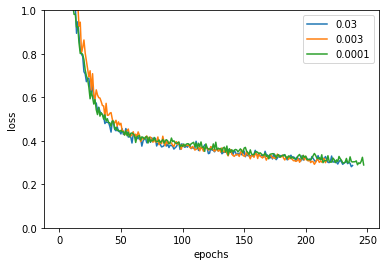

In [ ]:
LR = [0.03, 0.003, 0.0001]
for i in range(len(optimizers)):
    plt.plot(historys['history_'+str(i)].history['loss'], label=str(LR[i]))
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([0, 1]) # this is bcz loss at training 0.22 -> 0.24 -> 0.23 -> 0.22
    plt.legend()